# Import Library and Dataset

In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Project Data Science/Analyzing Product Sales - Kalbe Nutritionals')

#import dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('all_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cek Dataset

In [ ]:
#check overview
df.head()

,transaction_id,customer_id,date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,TR9944,249,2022-04-19,P1,8800,9,79200,3,47,0,Married,13.34,Choco Bar,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
1,TR61437,123,2022-01-05,P1,8800,4,35200,6,34,0,Married,4.36,Choco Bar,Lingga,Lingga,Modern Trade,-5.135399,119.423790
2,TR71804,218,2022-04-28,P1,8800,8,70400,3,29,0,Married,3.52,Choco Bar,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,TR89056,239,2022-03-29,P1,8800,8,70400,9,41,1,Married,6.55,Choco Bar,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,TR81324,352,2022-03-23,P1,8800,7,61600,1,69,0,Single,6.15,Choco Bar,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666


In [ ]:
#check the compatibility of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5020 non-null   object 
 1   customer_id     5020 non-null   int64  
 2   date            5020 non-null   object 
 3   product_id      5020 non-null   object 
 4   price           5020 non-null   int64  
 5   qty             5020 non-null   int64  
 6   total_amount    5020 non-null   int64  
 7   store_id        5020 non-null   int64  
 8   age             5020 non-null   int64  
 9   gender          5020 non-null   int64  
 10  marital_status  4976 non-null   object 
 11  income          5020 non-null   float64
 12  product_name    5020 non-null   object 
 13  store_name      5020 non-null   object 
 14  group_store     5020 non-null   object 
 15  type            5020 non-null   object 
 16  latitude        5020 non-null   float64
 17  longitude       5020 non-null   f

In [ ]:
#change data type date into datetime
df['date'] = df['date'].astype('datetime64')

In [ ]:
#make group by categorical
df_nums = df.select_dtypes(exclude=['datetime64', 'object'])
df_cats = df.select_dtypes(include='object')
df_date = df.select_dtypes(include='datetime64')

In [ ]:
#descriptive analytics for data type numericals
df_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5020.0,221.263745,129.672955,1.000000,108.000000,221.000000,332.000000,447.000000
price,5020.0,9684.800797,4600.708780,3200.000000,4200.000000,9400.000000,15000.000000,18000.000000
qty,5020.0,3.644622,1.855295,1.000000,2.000000,3.000000,5.000000,10.000000
total_amount,5020.0,32279.482072,19675.462455,7500.000000,16000.000000,28200.000000,47000.000000,88000.000000
store_id,5020.0,7.489841,4.028502,1.000000,4.000000,7.000000,11.000000,14.000000
age,5020.0,40.003586,12.834719,0.000000,30.000000,39.000000,51.000000,72.000000
gender,5020.0,0.452988,0.497835,0.000000,0.000000,0.000000,1.000000,1.000000
income,5020.0,8.623713,6.518242,0.000000,4.220000,7.720000,10.780000,71.300000
latitude,5020.0,-2.942236,4.323225,-7.797068,-6.914864,-5.135399,0.533505,5.548290
longitude,5020.0,109.600789,8.357593,95.323753,104.756554,110.370529,114.590111,128.190643


In [ ]:
#descriptive analytics for data type categories
desc_cats = df_cats.describe().T.reset_index()
desc_cats['persent mode to all data(%)'] = (desc_cats['freq'] / desc_cats['count'])*100
desc_cats['persent mode to all data(%)'] = desc_cats['persent mode to all data(%)'].apply(lambda x : round(x,2))
desc_cats

,index,count,unique,top,freq,persent mode to all data(%)
0,transaction_id,5020,4908,TR71313,3,0.06
1,product_id,5020,10,P5,814,16.22
2,marital_status,4976,2,Married,3779,75.94
3,product_name,5020,10,Thai Tea,814,16.22
4,store_name,5020,12,Lingga,738,14.70
5,group_store,5020,7,Prima,1085,21.61
6,type,5020,2,General Trade,2851,56.79


# Preprocessing

In [ ]:
#copy data for preprocessing and modeling
df_train = df.copy()

### Handling Missing Value and Data Duplicate

In [ ]:
#check missing value
df_mv = df_train.isna().sum().reset_index().rename(columns={0:'total_missing_values'})
df_mv ['percentage(%)'] = ((df_mv['total_missing_values']/df.shape[0])*100).apply(lambda x: round(x,2))
df_mv = df_mv.sort_values('total_missing_values', ascending=False)
df_mv

,index,total_missing_values,percentage(%)
10,marital_status,44,0.88
0,transaction_id,0,0.00
1,customer_id,0,0.00
16,latitude,0,0.00
15,type,0,0.00
14,group_store,0,0.00
13,store_name,0,0.00
12,product_name,0,0.00
11,income,0,0.00
9,gender,0,0.00


In [ ]:
ms_vc = df_train['marital_status'].value_counts().reset_index()
ms_vc['percentage(%)'] = ((ms_vc['marital_status'] / ms_vc['marital_status'].sum())*100).apply(lambda x: round(x,2))
ms_vc

,index,marital_status,percentage(%)
0,Married,3779,75.94
1,Single,1197,24.06


In [ ]:
df_train['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True) #replace missing value with mode of data

In [ ]:
#check duplicate data
if df_train.duplicated().any():
    print(f"There are {df_train.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


### Handle Outlier Data

In [ ]:
#handle outlier using z-score
#from scipy import stats

#print(f'total data before handling outlier :', df.shape[0])

#select columns
#df_zscore = df_nums

#calculate z-score
#zscore = np.abs(stats.zscore(df_zscore))

#set threshold
#threshold = 3

#identify outlier rows
#outlier_rows = np.where(zscore > threshold)[0]

#remove outlier rows
#df = df.drop(df.index[outlier_rows])

#print(f'total data after handling outlier :', df.shape[0])

### Feature Engineering

In [ ]:
#extract feature
df_train['month'] = df_train['date'].dt.month #extract month from feature date

#drop feature
col_drop = ['transaction_id', 'customer_id', 'date', 'product_id', 'store_id'] #drop columns that not relevant for running algorithm later
df_train.drop(columns=col_drop, inplace=True)

### Feature Transforming

In [ ]:
#standardscaler (mean=0, std=1)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
num_col = ['price', 'qty', 'total_amount', 'age', 'income']

for i in num_col:
  df_train[i] = ss.fit_transform(df_train[i].values.reshape(-1,1))

### Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = df_train.select_dtypes(include='object')

for i in col:
  df_train[i] = le.fit_transform(df[i])

# Modeling

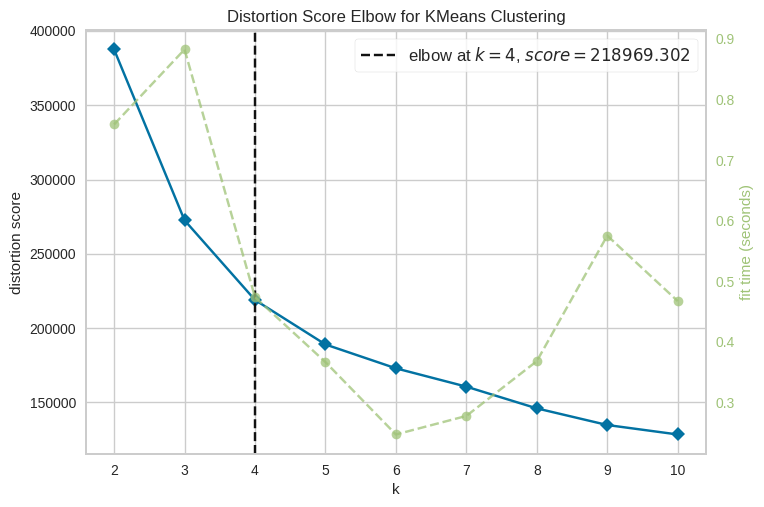

Best Cluster Value based on Elbow Method : 4


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=42)

# Instantiate the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2, 11))  # Range of cluster numbers from 2 to 10

# Fit the model to the data and visualize the silhouette scores
visualizer.fit(df_train)
visualizer.show()

# Get the best cluster value based on the highest silhouette score
best_cluster_em = visualizer.elbow_value_
print('Best Cluster Value based on Elbow Method :', best_cluster_em)

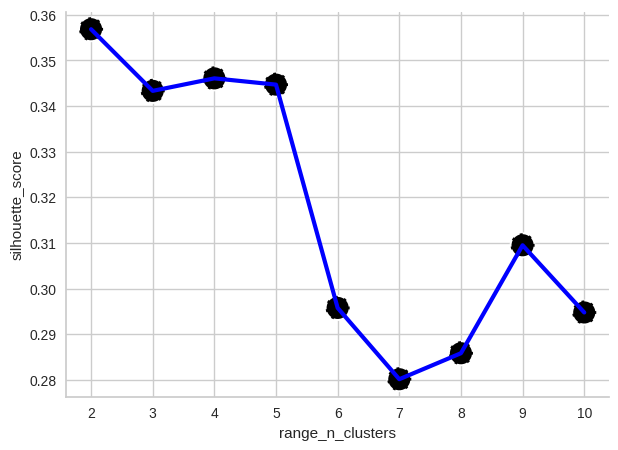

Maximum silhouette score : 0.35683578751510525
Best Cluster Value based on silhoutte score : 2


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,11)) #2, 3, 4, 5, 6, 7, 8, 9, 10
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df_train)
    predicted_labels = kmeans.predict(df_train)

    score_euclidean = silhouette_score(df_train, predicted_labels, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

#plot silhouette score
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='blue', linewidth=3) #plot for line
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='black', linestyle='--') #plot for dot
sns.despine()
plt.xlabel('range_n_clusters')
plt.ylabel('silhouette_score')
plt.show()

max_score = max(arr_silhouette_score_euclidean)
max_index = arr_silhouette_score_euclidean.index(max_score)
best_cluster_ss = range_n_clusters[max_index]

print("Maximum silhouette score :", max_score)
print("Best Cluster Value based on silhoutte score :", best_cluster_ss)

In [ ]:
#make label cluster into df
kmeans = KMeans(n_clusters=best_cluster_em, random_state=42).fit(df_train) #choose n_cluster based on best cluster from elbow method
clusters = kmeans.labels_ #for labeling into each row data
df['cluster'] = clusters

#principal component analysis (pca)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_value = pca.fit_transform(df_train)
df_pca = pd.DataFrame(data=pca_value, columns=['PC1','PC2','PC3','PC4','PC5'])
df_pca['cluster'] = clusters #for hue in plot

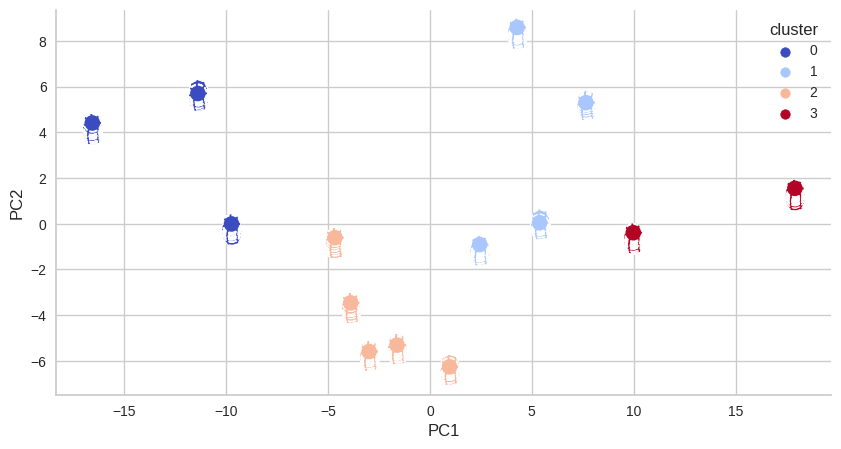

In [ ]:
#plotting 2D
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', s=150, palette='coolwarm', linestyle='--')

sns.despine()

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)

plt.show()

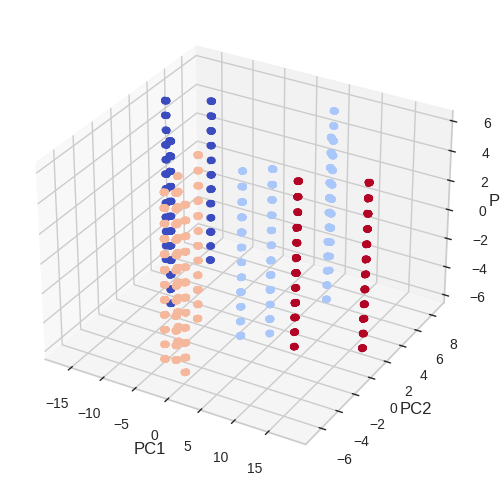

In [ ]:
#plotting 3D
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, hue) :
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x, y, z, c=hue, cmap='coolwarm')

  plt.tight_layout()
  sns.despine()

  ax.set_xlabel('PC1', fontsize=12)
  ax.set_ylabel('PC2', fontsize=12)
  ax.set_zlabel('PC3', fontsize=12)

  plt.show()

plot_3d(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], df_pca['cluster'])

#Conclusion

### To Choose Best Cluster, Used RFM Method

In [ ]:
df['cluster'].replace({0:1,1:2,2:3,3:4}, inplace=True)

#extract feature recency
from datetime import datetime

#make a function to calculate recency in days
def calculate_recency(row):
  today = datetime.now()
  recency = today - row['date']
  return recency.days

#create a new column using apply function
df['recency'] = df.apply(calculate_recency, axis=1)

#table agg monetary and recency
conc = df.groupby('cluster').agg({'total_amount':'mean', 'recency':'mean'}).reset_index()
conc['total_amount'] = conc['total_amount'].apply(lambda x: round(x,2))
conc['recency'] = conc['recency'].apply(lambda x: round(x,0))
conc.rename(columns={'total_amount':'monetary'},inplace=True)

#table agg frequency
conc_1 = df.groupby(['customer_id', 'cluster']).agg({'transaction_id':'count'}).reset_index().rename(columns=({'transaction_id':'frequency'}))
conc_1.sort_values('frequency', ascending=False, inplace=True)
conc_2 = conc_1.groupby('cluster').agg({'frequency':'mean'}).reset_index()
conc_2['frequency'] = conc_2['frequency'].apply(lambda x: round(x,0))

#join table
rfm = pd.merge(conc, conc_2, how='inner')
rfm

,cluster,monetary,recency,frequency
0,1,31540.46,392.0,3.0
1,2,31131.43,390.0,3.0
2,3,32811.15,396.0,4.0
3,4,34273.85,393.0,2.0


In [ ]:
#extract feature recency
from datetime import datetime

#make a function to calculate recency in days
def calculate_recency(row):
  today = pd.to_datetime('2023-01-01') #convert the string to a timestamp object
  recency = today - row['date']
  return recency.days

#create a new column using apply function
df['recency'] = df.apply(calculate_recency, axis=1)

#table agg monetary and recency
conc = df.groupby('cluster').agg({'total_amount':'mean', 'recency':'mean'}).reset_index()
conc['total_amount'] = conc['total_amount'].apply(lambda x: round(x,2))
conc['recency'] = conc['recency'].apply(lambda x: round(x,0))
conc.rename(columns={'total_amount':'monetary'},inplace=True)

#table agg frequency
conc_1 = df.groupby(['customer_id', 'cluster']).agg({'transaction_id':'count'}).reset_index().rename(columns=({'transaction_id':'frequency'}))
conc_1.sort_values('frequency', ascending=False, inplace=True)
conc_2 = conc_1.groupby('cluster').agg({'frequency':'mean'}).reset_index()
conc_2['frequency'] = conc_2['frequency'].apply(lambda x: round(x,0))

#join table
rfm = pd.merge(conc, conc_2, how='inner')
rfm

,cluster,monetary,recency,frequency
0,1,31540.46,185.0,3.0
1,2,31131.43,183.0,3.0
2,3,32811.15,189.0,4.0
3,4,34273.85,186.0,2.0


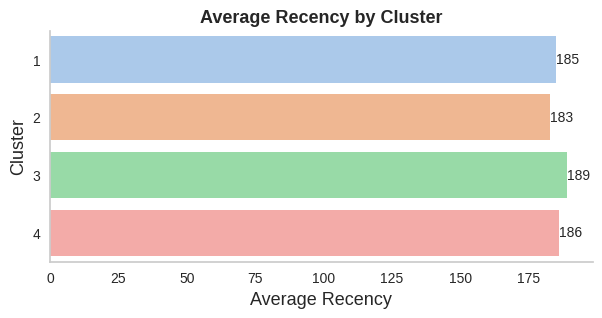

In [ ]:
# Plot Based on Recency
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.grid(False)

sns.barplot(data=rfm, y='cluster', x='recency', palette='pastel', orient='horizontal')

for index, value in enumerate(rfm['recency']):
    ax.text(value, index, str(int(value)), ha='left', va='center', fontsize=10)

plt.title('Average Recency by Cluster', fontsize=13, weight='bold')
plt.ylabel('Cluster', fontsize=13)
plt.xlabel('Average Recency', fontsize=13)

sns.despine()
plt.show()

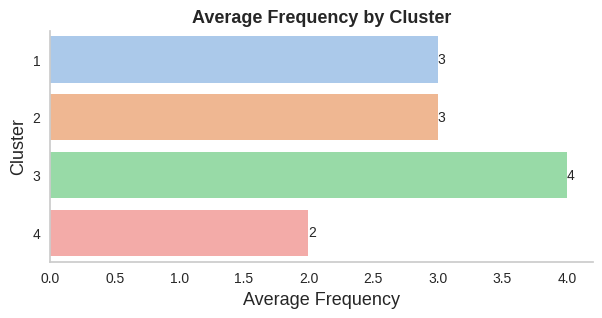

In [ ]:
# Plot Based on Frequency
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.grid(False)

sns.barplot(data=rfm, y='cluster', x='frequency', palette='pastel', orient='horizontal')

for index, value in enumerate(rfm['frequency']):
    ax.text(value, index, str(int(value)), ha='left', va='center', fontsize=10)

plt.title('Average Frequency by Cluster', fontsize=13, weight='bold')
plt.ylabel('Cluster', fontsize=13)
plt.xlabel('Average Frequency', fontsize=13)

sns.despine()
plt.show()

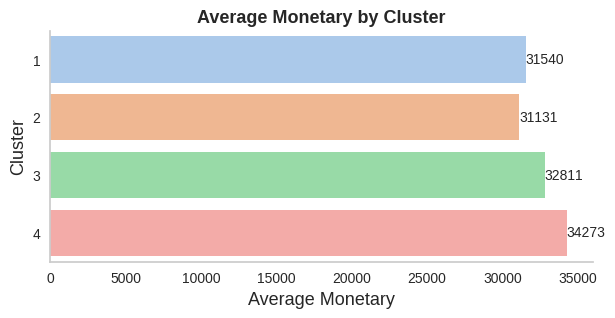

In [ ]:
# Plot Based on Monetary
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.grid(False)

sns.barplot(data=rfm, y='cluster', x='monetary', palette='pastel', orient='horizontal')

for index, value in enumerate(rfm['monetary']):
    ax.text(value, index, str(int(value)), ha='left', va='center', fontsize=10)

plt.title('Average Monetary by Cluster', fontsize=13, weight='bold')
plt.ylabel('Cluster', fontsize=13)
plt.xlabel('Average Monetary', fontsize=13)

sns.despine()
plt.show()